In [1]:
!pip install tensorflow keras numpy matplotlib

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

In [3]:
imdb = keras.datasets.imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=10000)

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
x_train = keras.preprocessing.sequence.pad_sequences(x_train, maxlen=200)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, maxlen=200)

In [5]:
model = keras.Sequential([
    layers.Embedding(10000, 32, input_length=200),
    layers.LSTM(64),
    layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [6]:
history = model.fit(x_train, y_train, epochs=3, batch_size=64,
                    validation_data=(x_test, y_test))

Epoch 1/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 62s 152ms/step - accuracy: 0.7165 - loss: 0.5229 - val_accuracy: 0.8483 - val_loss: 0.3444
Epoch 2/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 59s 150ms/step - accuracy: 0.9037 - loss: 0.2424 - val_accuracy: 0.8698 - val_loss: 0.3101
Epoch 3/3
391/391 ━━━━━━━━━━━━━━━━━━━━ 83s 153ms/step - accuracy: 0.9333 - loss: 0.1789 - val_accuracy: 0.8613 - val_loss: 0.3389


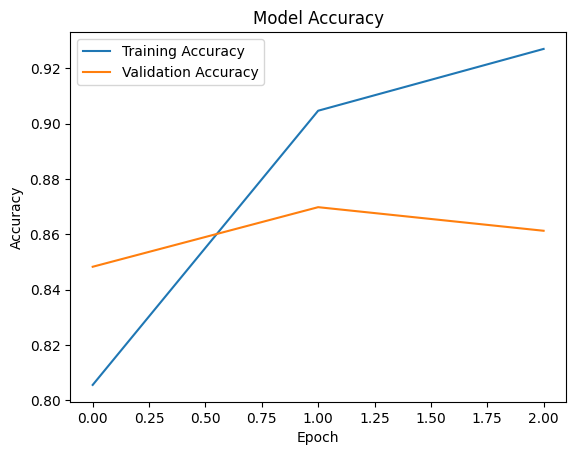

In [7]:
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [8]:
word_index = imdb.get_word_index()
reverse_word_index = {v: k for k, v in word_index.items()}

def decode_review(encoded_review):
    return ' '.join([reverse_word_index.get(i - 3, '?') for i in encoded_review])

sample = x_test[10]
decoded = decode_review(sample)
print("Review:", decoded)

prediction = model.predict(np.expand_dims(sample, axis=0))
sentiment = "😊 Positive" if prediction[0][0] > 0.5 else "😞 Negative"
print("Predicted Sentiment:", sentiment)

1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Review: of two men ? murders in exchange for getting rid of the two people messing up their lives throw ? from the train is an original and very inventive comedy take on the idea it's a credit to danny ? that he both wrote and starred in this minor comedy gem br br anne ? is the mother who ? the film's title and it's understandable why she gets under the skin of danny ? with her sharp tongue and relentlessly putting him down for any minor ? billy crystal is the writer who's wife has stolen his book idea and is now being ? as a great new author even appearing on the oprah show to in ? he should be enjoying thus ? gets the idea of ? murders to rid themselves of these ? factors br br of course everything and anything can happen when writer carl ? lets his imagination ? with ? ideas for how the plot develops and it's amusing all the way through providing plenty of laughs and chuckles along the way as well as a good deal of suspense br br for